In questa esercitazione userò un programma di dinamica molecolare, basato sull'algoritmo di Verlet, per simulare la dinamica di un sistema isolato composto da 108 particelle contenute in una scatola con periodic boundary conditions.

# Esercizio 04.1

Ho implementato la ripartenza della simulazione sfruttando le posizioni degli atomi in due instanti consecutivi, e con la correzione delle velocità per raggiungere una temperatura target. Per fare questo ho introdotto una variabile ulteriore nel file di input che serve a specificare se si vuole ripartire da due posizioni successive, memorizzate alla fine del run precedente, oppure se si vuole partire daccapo, usando una posizione iniziale e le velocità estratte a random. La temperatura è ottenibile a partire dall'energia cinetica media $\langle K \rangle$ attraverso il teorema del Viriale (facilmente ricavabile nell'ensamble canonico), dal quale segue il principio di equipartizione 
$2\langle K \rangle = 3Nk_B T$, dove $N$ è il numero di atomi. Ad ogni ripartenza, dopo aver trovato T, si riscalano le tre componenti delle velocità per il fattore correttivo $\sqrt{T_{target}/T}$ dove $T_{target}$ è la temperatura su cui si vuole equilibrare il sistema.
Le unità utilizzate sono quelle di Lennard e Jones. La temperatura target è 0.8, e la fase è solida. I parametri della simulazione sono:
- $T* = 0.8$
- $\rho* = 1.1$
- raggio di cut-off $r_c = 2.2$

Di seguito plotto gli andamenti delle quattro quantità misurate (temperatura, energia cinetica, energia potenziale, energia totale), ottenuti facendo ripartire per quattro volte la simulazione, che ha durata 10000 step dopo ogni ripartenza. Le posizioni degli atomi vengono prese ogni dieci passi dell'algoritmo, per evitare di avere dati sovrabbondanti, relativi a configurazioni molto correlate fra loro.

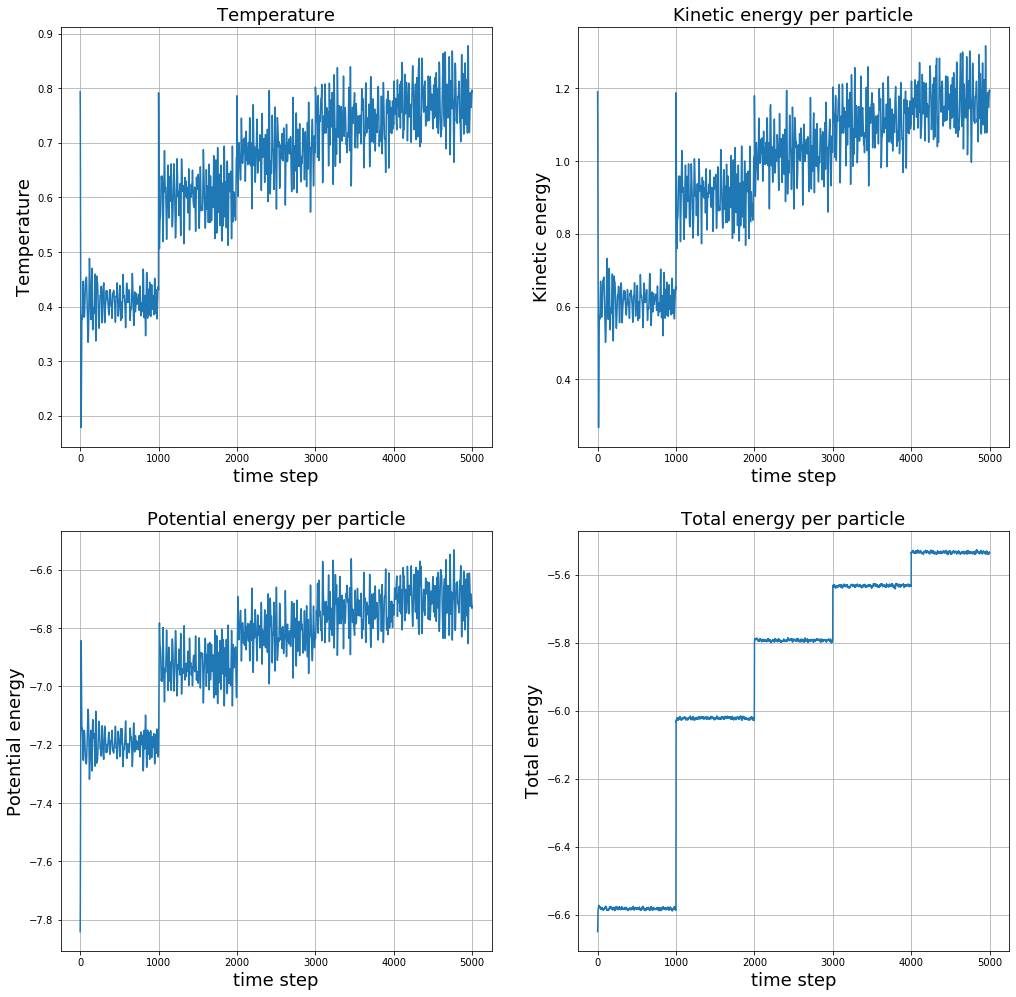

In [1]:
import matplotlib.pyplot as plt
import numpy as np

filename = "MolecularDynamics_NVE_22/esercizio04_1/output_temp.dat"

#carico i dati
f = open(filename, 'r')
temp = f.readlines()
temp_ = [float(t) for t in temp]

filename = "MolecularDynamics_NVE_22/esercizio04_1/output_ekin.dat"

#carico i dati
f = open(filename, 'r')
ekin = f.readlines()
ekin_ = [float(t) for t in ekin]

filename = "MolecularDynamics_NVE_22/esercizio04_1/output_epot.dat"

#carico i dati
f = open(filename, 'r')
epot = f.readlines()
epot_ = [float(t) for t in epot]

filename = "MolecularDynamics_NVE_22/esercizio04_1/output_etot.dat"

#carico i dati
f = open(filename, 'r')
etot = f.readlines()
etot_ = [float(t) for t in etot]

#plot
plt.figure(figsize=[17, 17])

plt.subplot(2,2,1)
plt.plot(temp_)
plt.title('Temperature',fontsize=18)
plt.xlabel('time step',fontsize=18)
plt.ylabel('Temperature',fontsize=18)
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(ekin_)
plt.title('Kinetic energy per particle',fontsize=18)
plt.xlabel('time step',fontsize=18)
plt.ylabel('Kinetic energy',fontsize=18)
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(epot_)
plt.title('Potential energy per particle',fontsize=18)
plt.xlabel('time step',fontsize=18)
plt.ylabel('Potential energy',fontsize=18)
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(etot_)
plt.title('Total energy per particle',fontsize=18)
plt.xlabel('time step',fontsize=18)
plt.ylabel('Total energy',fontsize=18)
plt.grid(True)

f.close()

Si può notare come dopo poche ripartenze la temperatura del sistema converga verso la temperatura target. Possiamo già notare come l'energia totale abbia delle fluttuazioni di ampiezza molto inferiore rispetto ad energia cinetica, potenziale e temperatura: questo è coerente con il fatto che l'energia del nostro sistema, isolato, è conservata.

# Esercizio 04.2

Ho implementato il data blocking introducendo una funzione "blocking()", che faccio agire ogni "nInBlock" step. Questa funzione sfrutta le somme delle quantità di interesse, che vengono aggiornate nella funzione "Measure" durante l'esecuzone di ogni blocco, per calcolare i valori di aspettazione per ogni blocco e quindi le medie complessive e i rispettivi errori. 

# Esercizio 04.3

## Fase solida

Mostro come si presenta il moto del sistema, dopo aver eseguito l'equilibrazione con cinque ripartenze. Si può osservare come venga mantenuta la geometria cristallina, nonostante gli atomi si spostino leggermente dalle proprie posizioni di equilibrio.
I parametri usati per la simulazione sono: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$), i blocchi sono formati da 50 step ciascuno.

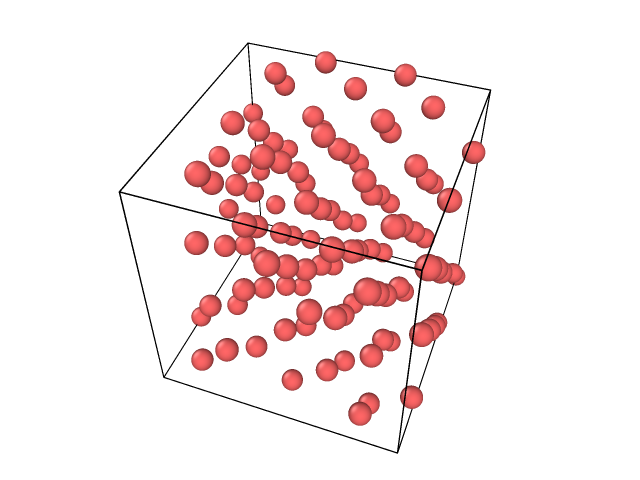

Text(0, 0.5, 'total energy [J]')

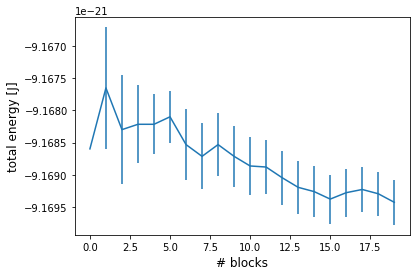

In [2]:
filename = "MolecularDynamics_NVE_22/solid/etot_err.dat"
etot = np.loadtxt(filename, usecols = 0)
etot_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(etot))

etot=etot*120*1.380649*1e-23
etot_err=etot_err*120*1.380649*1e-23
plt.errorbar(blocks, etot, yerr = etot_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('total energy [J]', fontsize = 12)

Text(0, 0.5, 'potential energy [J]')

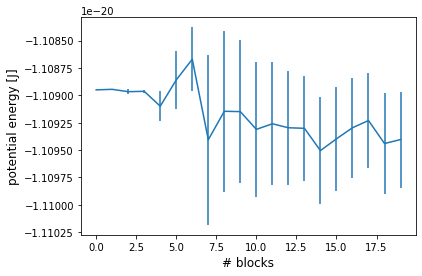

In [7]:
filename = "MolecularDynamics_NVE_22/solid/epot_err.dat"
etot = np.loadtxt(filename, usecols = 0)
etot_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(etot))

etot=etot*120*1.380649*1e-23
etot_err=etot_err*120*1.380649*1e-23
plt.errorbar(blocks, etot, yerr = etot_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('potential energy [J]', fontsize = 12)

Text(0, 0.5, 'kinetic energy [J]')

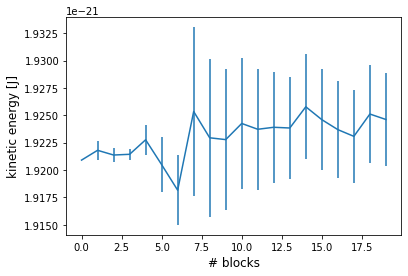

In [6]:
filename = "MolecularDynamics_NVE_22/solid/ekin_err.dat"
etot = np.loadtxt(filename, usecols = 0)
etot_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(etot))

etot=etot*120*1.380649*1e-23
etot_err=etot_err*120*1.380649*1e-23
plt.errorbar(blocks, etot, yerr = etot_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('kinetic energy [J]', fontsize = 12)

Text(0, 0.5, 'temperature [K]')

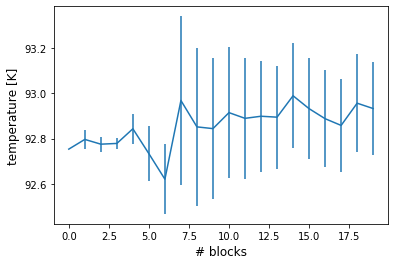

In [4]:
filename = "MolecularDynamics_NVE_22/solid/temp_err.dat"
temp = np.loadtxt(filename, usecols = 0)
temp_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(etot))

temp=temp*120
temp_err=temp_err*120
plt.errorbar(blocks, temp, yerr = temp_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('temperature [K]', fontsize = 12)

Il numero di blocchi usato nella simulazione è ridotto per questioni di ottimizzazione del tempo di simulazione.

## Fase liquida

Ripeto la simulazione per la fase liquida e mostro i grafici con i risultati ottenuti per l'energia e la temperatura.

Text(0, 0.5, 'total energy [J]')

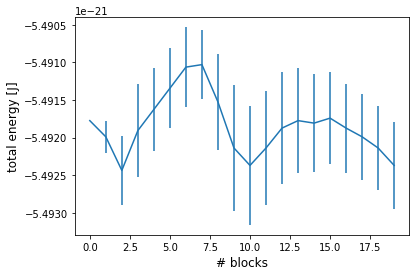

In [11]:
filename = "MolecularDynamics_NVE_22/liquid/etot_err.dat"
etot = np.loadtxt(filename, usecols = 0)
etot_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(etot))

etot=etot*120*1.380649*1e-23
etot_err=etot_err*120*1.380649*1e-23
plt.errorbar(blocks, etot, yerr = etot_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('total energy [J]', fontsize = 12)

Text(0, 0.5, 'potential energy [J]')

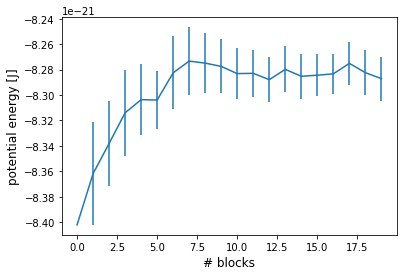

In [8]:
filename = "MolecularDynamics_NVE_22/liquid/epot_err.dat"
etot = np.loadtxt(filename, usecols = 0)
etot_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(etot))

etot=etot*120*1.380649*1e-23
etot_err=etot_err*120*1.380649*1e-23
plt.errorbar(blocks, etot, yerr = etot_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('potential energy [J]', fontsize = 12)

Text(0, 0.5, 'kinetic energy [J]')

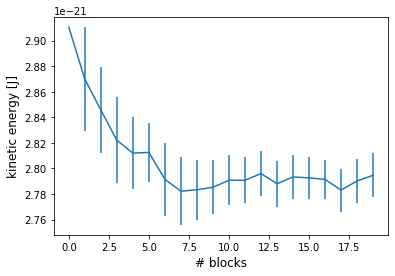

In [9]:
filename = "MolecularDynamics_NVE_22/liquid/ekin_err.dat"
etot = np.loadtxt(filename, usecols = 0)
etot_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(etot))

etot=etot*120*1.380649*1e-23
etot_err=etot_err*120*1.380649*1e-23
plt.errorbar(blocks, etot, yerr = etot_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('kinetic energy [J]', fontsize = 12)

Text(0, 0.5, 'temperature [K]')

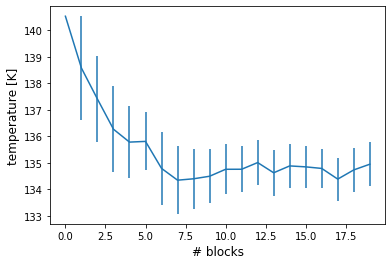

In [13]:
filename = "MolecularDynamics_NVE_22/liquid/temp_err.dat"
temp = np.loadtxt(filename, usecols = 0)
temp_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(etot))

temp=temp*120
temp_err=temp_err*120
plt.errorbar(blocks, temp, yerr = temp_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('temperature [K]', fontsize = 12)

## Fase gassosa

Text(0, 0.5, 'total energy [J]')

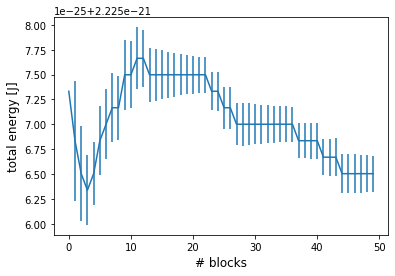

In [17]:
filename = "MolecularDynamics_NVE_22/gas/etot_err.dat"
etot = np.loadtxt(filename, usecols = 0)
etot_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(etot))

etot=etot*120*1.380649*1e-23
etot_err=etot_err*120*1.380649*1e-23
plt.errorbar(blocks, etot, yerr = etot_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('total energy [J]', fontsize = 12)

Text(0, 0.5, 'potential energy [J]')

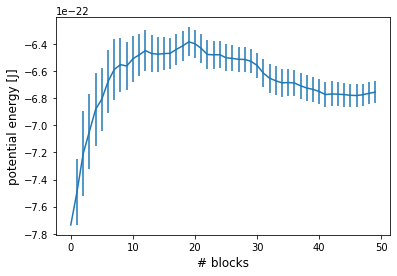

In [11]:
filename = "MolecularDynamics_NVE_22/gas/epot_err.dat"
etot = np.loadtxt(filename, usecols = 0)
etot_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(etot))

etot=etot*120*1.380649*1e-23
etot_err=etot_err*120*1.380649*1e-23
plt.errorbar(blocks, etot, yerr = etot_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('potential energy [J]', fontsize = 12)

Text(0, 0.5, 'kinetic energy [J]')

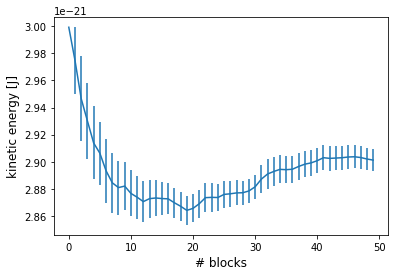

In [10]:
filename = "MolecularDynamics_NVE_22/gas/ekin_err.dat"
etot = np.loadtxt(filename, usecols = 0)
etot_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(etot))

etot=etot*120*1.380649*1e-23
etot_err=etot_err*120*1.380649*1e-23
plt.errorbar(blocks, etot, yerr = etot_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('kinetic energy [J]', fontsize = 12)

Text(0, 0.5, 'temperature [K]')

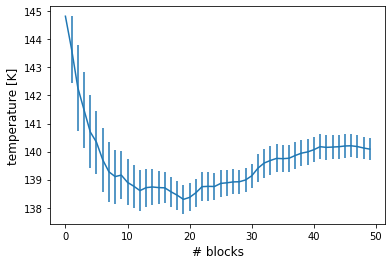

In [18]:
filename = "MolecularDynamics_NVE_22/gas/temp_err.dat"
temp = np.loadtxt(filename, usecols = 0)
temp_err = np.loadtxt(filename, usecols = 1)
blocks = np.arange(0,np.size(etot))

temp=temp*120
temp_err=temp_err*120
plt.errorbar(blocks, temp, yerr = temp_err)
  
plt.xlabel('# blocks', fontsize = 12)
plt.ylabel('temperature [K]', fontsize = 12)